# EE120 Minilab 3: Video Magnification

Ming Jin, Instructor: Prof. Ron Fearing

<b>Human perception is limited.</b> Yet the substle changes out of our detection radar can be extremely valuable. What if we can detect a person's pulse by simply looking his/her face? What if we can pinpoint the crack in the bridge or house before it's too fragile? What if we can perceive even the slightest rocking of the towering crane in the breeze? Revealing the invisible changes has been only appeared in superhero movies. 

In EE120, we will bestow that <em>superpower</em> to you and may you become the master of the Force.

## Fundamentals: 1D example

The idea of motion magnification is quite simple and elegant: the subtle temporal changes in the video are extracted using a bandpass filter, amplified in magnitude, and added back to the original signal. In this section, you will be working with a simple 1D image "band" (rather than a 2D image), and explore the working principles and conditions.

Let's denote $I(x,t)$ as the gray-scale intensity of the image band, where $x\in [0,2]$ is the spatial location, and $t\geq 0$ is the time variable. Assume that the band undergoes a subtle (probably unobservable) translational motion, expressed as the observed video intensity function with respect to a displacement function $\delta(t)$, such that $I(x,t)=f(x+\delta(t),t)$. Our goal is to exagerate the displacement function, i.e., to synthesize the signal $\hat{I}(x,t)=f(x+(1+\alpha)\delta(t),t)$, where $\alpha>0$ is the amplification factor.

Using the first-order Taylor series expansion, we can write the image at time $t$, $f(x+(1+\alpha)\delta(t),t)$ as:
$I(x,t)\approx f(x,t)+\delta(t)\frac{\partial f(x,t)}{\partial x}$.
Let $B(x,t)$ be the result of applying a temporal bandpass filter at every position $x$ that extracts the subtle temporal changes, i.e., $B(x,t)=\delta(t)\frac{\partial f(x,t)}{\partial x}$. Now we can amplify the bandpass signal by $\alpha$ an add it back to $I(x,t)$: $\tilde{I}(x,t)=I(x,t)+\alpha B(x,t)\approx f(x,t)+(1+\alpha)\delta(t)\frac{\partial f(x,t)}{\partial x}$. If the first order Taylor expansion holds for the amplied signal, then we get back the synthesis signal with amplified larger perturbation!

<b>Throughout this section, we will work with the image function signal, given by:</b>
$$I(x,t) = \cos\big(2\pi (x-t+(1+\alpha)\delta(t))\big)$$
where $1+\alpha$ (with $\alpha\geq 0$) is the amplitude magnification factor, and $\delta(t)=0.005\cos(2\pi f_0 t)$ is the "subtle" motion function, with $f_0=4 Hz$ being the frequency of the oscillation motion. 

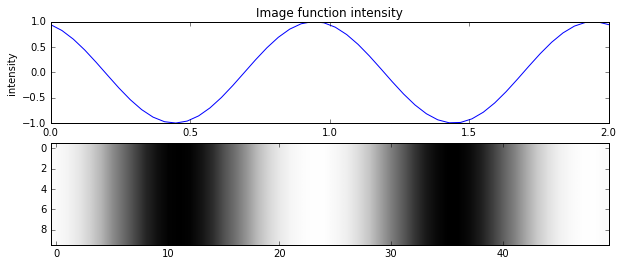

In [45]:
import numpy
import matplotlib.pyplot as plt
from IPython.html.widgets import *
%matplotlib inline

# Now let's define our displacement function delta(t)
def delta_func(t,freq=4): 
    return 0.005*numpy.cos(2 * numpy.pi * freq * t)

# This is our image function, I(x,t) = \cos\big(2\pi (x-t+(1+\alpha)\delta(t))\big)
def image_func(x,t,alpha=0):
    delta_t = delta_func(t=t)
    return numpy.cos(2 * numpy.pi * (x - t +(1+alpha)*delta_t))

# This plots our image function, I(x,t) for a given time t, 
#   along with a image band showing the intensity along its x axis
def pltsin(t,alpha):
    x = numpy.linspace(0, 2, 50)
    y = image_func(x,t,alpha=alpha)
    plt.figure(figsize=(10,4))
    # Now lets' draw the intensity values
    plt.subplot(2, 1, 1)
    plt.plot(x,y), plt.title('Image function intensity'), plt.xlabel('space domain'), plt.ylabel('intensity')
    # Here is the 1D band
    plt.subplot(2, 1, 2)
    plt.imshow(numpy.tile(y,(10,1)), cmap='Greys_r', aspect='auto')

# STUDENT: Play with the time, t, and amplification magnitude, alpha
interact(pltsin, t=(0,1,0.01),alpha=[0,20,5]);

As you play with the amplification factor, $\alpha$, you might have noticed that for the subtle motion added on top of the mega-movement is not noticable for small values, but becomes more pronounced as $\alpha$ increases. What's just happened? Let's examine a single pixel, e.g., $x=1$, individually.

<b> Q1: Please write out the intensity function for pixel at $x=1$. Attach the plots for amplification factors $\alpha=0, 10, 20, 50, 100$. What do you observe? </b>

(<matplotlib.text.Text at 0x11f59c050>, <matplotlib.text.Text at 0x11f804ad0>)

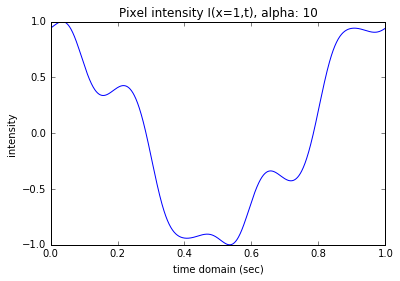

In [46]:
# Now let's take a look at the intensity at a specific pixel, x=1
sample_interval = 0.001
### STUDENT: Choose the amplification magnitude and observe the effect in the time domain
alpha = 10
### STUDENT END
x, t = 1.0,numpy.arange(0,1,sample_interval)
y_pixel = image_func(x,t,alpha)
plt.plot(t,y_pixel), plt.title('Pixel intensity I(x=1,t), alpha: '+str(alpha))
plt.xlabel('time domain (sec)'), plt.ylabel('intensity')

Our goal is to exagerate the displacement effect to reveal the hidden changes. As discussed in the beginning of the section, to achieve this, the imperceptible temporal changes in the video are extracted using a bandpass filter, amplified in magnitude, and added back to the original signal. 

<b>Q2:</b> Write out the Fourier Transform of $I(1,t)$ from Q1 for the case when $\alpha$ is very small. (Hint: you can use the Taylor series expansion.) What are the frequency components related to the displacement function $\delta(t)$? 

<b>Q3:</b> Does your answer in Q2 apply for large $\alpha$? Test your argument with the following plots, and attach the results for $\alpha=0,10,20,50,100$. 

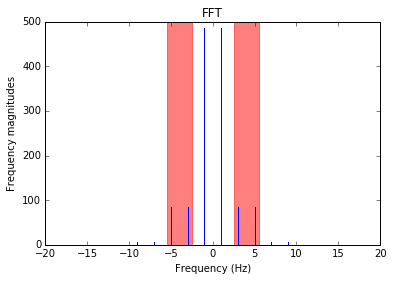

In [47]:
### STUDNET: Choose the cutoff frequency, freq_min, freq_max, that highlight the frequency components of \delta(t)
freq_min,freq_max = 2.5,5.5
### STUDENT END
### STUDENT: Choose the amplification magnitude and observe the effect in the frequency domain
alpha = 10
### STUDENT END
x, t = 1.0,numpy.arange(0,1,sample_interval)
y_pixel = image_func(x,t,alpha)
frequencies = numpy.fft.fftfreq(len(t), d=sample_interval)
plt.subplot()
plt.title("FFT"),plt.xlabel('Frequency (Hz)'), plt.ylabel('Frequency magnitudes'), plt.xlim([-20,20])
plt.stem(frequencies, abs(numpy.fft.fft(y_pixel)), markerfmt=" ")
plt.axvspan(freq_min, freq_max, alpha=0.5, color='red')
plt.axvspan(-freq_max, -freq_min, alpha=0.5, color='red')

So far, we have been working directly with the image function $I(x,t) = \cos\big(2\pi (x-t+(1+\alpha)\delta(t))\big)$ - however, as you might already wonder, we DO NOT really know what the displacement function is in practice. We do, nevertheless, know about the range of frequency that the displacement function might lie in, e.g., <b>freq_min</b> and <b>freq_max</b> that you specified above.

Next, let's implement the temporal filter that will extract the signal, $B(1,t)$ (as defined in the beginning of the section), in the frequency range of interests from the original signal $I(1,t)$, with $\alpha=0$.

In [48]:
# Implement the temporal bandpass filter
def bandpass_filter(x, sample_interval, freq_min, freq_max):
    # Inputs:
    # x: temporal signal of shape (N,)
    # sample_interval: the temporal sampling interval.
    # freq_min, freq_max: cut-off frequencies for bandpass filter
    # Output:
    # Band-passed signal, with only frequency components (absolute value) between freq_min and freq_max  preserved
    
    ### STUDENT: Implement the bandpass filter. 
    ### Feel free to use numpy.fft.fft, numpy.fft.fftfreq, numpy.fft.ifft
    fft = numpy.fft.fft(x)
    frequencies = numpy.fft.fftfreq(len(x), d=sample_interval)
    bound_low = (numpy.abs(frequencies - freq_min)).argmin()
    bound_high = (numpy.abs(frequencies - freq_max)).argmin()
    fft[:bound_low] = 0
    fft[bound_high:-bound_high] = 0
    fft[-bound_low:] = 0
    band_pass_signal = numpy.fft.ifft(fft, axis=0)
    ### STUDENT END
    return band_pass_signal

Applying bandpass between 2.5 and 5.5 Hz


(<matplotlib.text.Text at 0x1218aa850>, <matplotlib.text.Text at 0x11f5aead0>)

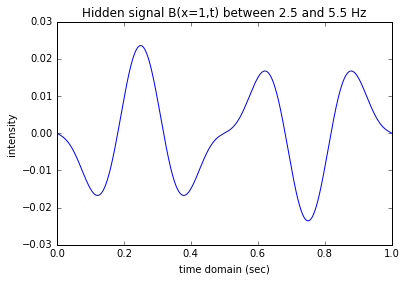

In [50]:
# Assume you have implemented the bandpass_filter function correctly, we now extract the hidden signal
y_orig = image_func(x,t,alpha=0.0) #The original signal
print("Applying bandpass between " + str(freq_min) + " and " + str(freq_max) + " Hz")
hidden_signal = bandpass_filter(y_orig,sample_interval,freq_min,freq_max) 
plt.plot(t,hidden_signal), plt.title('Hidden signal B(x=1,t) between ' +str(freq_min)+' and '+str(freq_max)+' Hz')
plt.xlabel('time domain (sec)'), plt.ylabel('intensity')

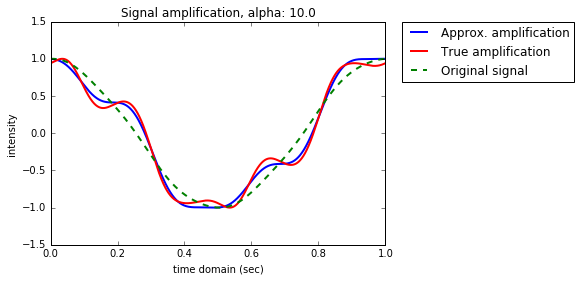

In [51]:
# Next, let's amplify the hidden signal by alpha and add it back to the original signal.
### STUDENT: Specify the amplification factor alpha based on your experirences so far
alpha = 10.0
### STUDENT END
### SUDENT: Compose the signal with amplified motion, i.e., \hat{I}(1,t)
def approx_amplify(y_orig,hidden_signal,alpha):
    return y_orig + alpha*hidden_signal
### STUDENT END
y_amp = approx_amplify(y_orig,hidden_signal,alpha)
plt.title('Signal amplification, alpha: '+str(alpha)), plt.xlabel('time domain (sec)'), plt.ylabel('intensity')
plt.plot(t,y_amp,linewidth=2,color='b',label='Approx. amplification'),
# Now we plot the true amplified signal
y_amp_true = image_func(x,t,alpha)
plt.plot(t,y_amp_true,linewidth=2,color='r',label='True amplification')
# And the original signal
plt.plot(t,y_orig,linewidth=2,linestyle='--',color='g',label='Original signal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<b>Q4:</b> What is our amplification signal, $\tilde{I}(x,t)$ (if you use $B(x,t)$, please clearly indicate what it represents)? What do you observe from the above amplification results? Attach the plots for different amplification factors $\alpha=10,20,50,100$, and indicate the reliability of amplification as $\alpha$ increases.

Voila! All we need to do is to apply this to all the pixels of the image band. Try the following block of codes with your magnified signal. Can you see the desired result with the subtle motion BOLDLY magnified?! This also demonstrates how temporal filtering interplays with spatial motion in videos.

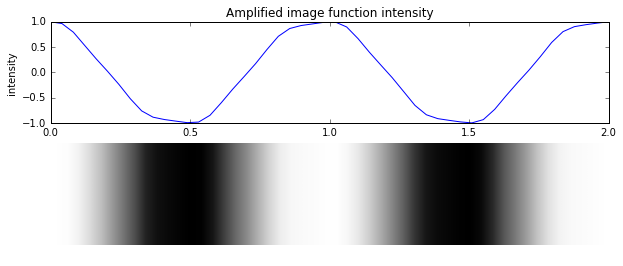

In [53]:
x,tvec = numpy.linspace(0, 2, 50),numpy.arange(0,1,sample_interval)
y_amp_movie = numpy.zeros((len(t),len(x)))
### STUDENT: examine different alpha
alpha = 10.0 
### STUDENT END
for x_i in range(len(x)):
    y_orig = image_func(x[x_i],t,alpha=0.0)
    hidden_signal = bandpass_filter(y_orig,sample_interval,freq_min,freq_max) 
    y_approx = approx_amplify(y_orig,hidden_signal,alpha)
    # NOTE: We need to implement this normalization to visualize in the grayscale image
    y_approx_norm = y_approx/numpy.max(abs(y_approx))
    y_amp_movie[:,x_i] = y_approx_norm
    
def pltsin_approx(t):
    t_ind = (numpy.abs(tvec - t)).argmin()
    plt.figure(figsize=(10,4))
    # Now lets' draw the intensity values
    plt.subplot(2, 1, 1)
    y = y_amp_movie[t_ind,:]
    plt.plot(x,y), plt.title('Amplified image function intensity'), plt.xlabel('space domain'), plt.ylabel('intensity')
    # Here is the 1D band
    plt.subplot(2, 1, 2),plt.axis("off")
    plt.imshow(numpy.tile(y,(10,1)), cmap='Greys_r', aspect='auto')
# STUDENT: Play with the time, t, and amplification magnitude, alpha
interact(pltsin_approx, t=(0,1,0.01));

## Application: Facial Pulse Detection

The above idea can be easily extended to 2D image. A video is a sequence of frames, played back at a rate determined by frames per second (fps), typically 30Hz, and each frame is simply an image coded in three color channels, usually Red, Green, and Blue. The motion magnification, when applied to each pixel in its respective color channel, is effectively magnifying both the motion changes and the color changes. 

In [54]:
import sys
import os
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy
import imageio
from IPython.display import HTML

In [55]:
# Now let's first take a look at the raw video. 
HTML("""
<video width="396" height="444" controls>
  <source src="media/face.mp4" type="video/mp4">
</video>
""")

In [56]:
# Utility function to load and write videos
def loadVideo(filename):
    reader = imageio.get_reader(filename)
    fps = reader.get_meta_data()['fps']
    orig_vid = []
    for i, im in enumerate(reader):
        orig_vid.append(im)
    return numpy.asarray(orig_vid),fps

Our first step is to spatially process the frames to increase the temporal signal-to-noise ratio, a procedure known as "spatial pooling". Specifically, we will make use of the 2D isotropic (i.e., circularly symmetric) Gaussian filter:
$$ G(x,y) = \frac{1}{\sum_{|x|\leq M,|y|\leq M}G(x,y)}e^{-\frac{x^2+y^2}{2\sigma^2}}$$
where $x, y = 0, \pm 1, \pm 2, \cdots$ represent the centered pixel locations, $M$ is the size of the filter, and $\frac{1}{\sum_{x,y}G(x,y)}$ is the normalization factor. For instance, a 3 by 3 Gaussian filter ($M=3$, $\sigma=1$) is given by:

The Gaussian kernel is then convolved with the frame. For any pixel at location $x_0,y_0$, the new pixel value is given by: $\sum_{|x|\leq M, |y|\leq M}G(x,y)I(x_0-x,y_0-y)$, where $x,x_0,y,y_0$ are integers. Note the similarity to the 1D convolution.

<b>Q5:</b> Implement the below block of codes to compute the Gaussian filter of any odd size. Write out the Gaussian filter for size 5 by 5 and $\sigma=1$. What does the Gaussian filter do in effect?

In [57]:
# Define the Gaussian kernel
def gausKernel(sz = 5,sigma=1):
    kernel = numpy.zeros((sz,sz))
    ### STUDENT: Implement the Gaussian kernel
    sz_1 = int(sz/2)
    for x in (numpy.arange(sz)-sz_1):
        for y in (numpy.arange(sz)-sz_1):
            ix,iy = x+sz_1,y+sz_1
            kernel[ix,iy] = numpy.exp(-(x**2+y**2)/(2.0*sigma**2))
    kernel = kernel / numpy.sum(kernel)
    ### STUDENT END
    return kernel
print(gausKernel(sz=5))

[[ 0.00296902  0.01330621  0.02193823  0.01330621  0.00296902]
 [ 0.01330621  0.0596343   0.09832033  0.0596343   0.01330621]
 [ 0.02193823  0.09832033  0.16210282  0.09832033  0.02193823]
 [ 0.01330621  0.0596343   0.09832033  0.0596343   0.01330621]
 [ 0.00296902  0.01330621  0.02193823  0.01330621  0.00296902]]


<b>Q6:</b> Study the below codes: what do gausPyrDown and gausPyrUp do? Why we need this step? (Hint: check the dimensions of the video data, and how many times we need to perform temporal filtering)

In [58]:
def gausPyrDown(frame,sz=5,sigma=1):
    height, width, channel = frame.shape
    convFrame = numpy.zeros(shape=(height, width,channel), dtype="float")
    kernel = gausKernel(sz=sz,sigma=sigma)
    for channel_i in range(channel):
        convFrame[:,:,channel_i] = scipy.ndimage.convolve(frame[:,:,channel_i],kernel)
    downFrame = convFrame[::2,::2,:]
    return downFrame

def gausPyrUp(frame,sz=5,sigma=1):
    height, width, channel = frame.shape
    upFrame = numpy.zeros(shape=(2*height, 2*width,channel), dtype="float")
    kernel = gausKernel(sz=sz,sigma=sigma)
    for channel_i in range(channel):
        upFrame[::2,::2,channel_i] = frame[:,:,channel_i]
        upFrame[:,:,channel_i] = scipy.ndimage.convolve(upFrame[:,:,channel_i],kernel*4)
    return upFrame

def gaussian_video(video, shrink_multiple):
    """Create a gaussian representation of a video"""
    vid_data = None
    for x in range(0, video.shape[0]):
        frame = video[x]
        gauss_copy = numpy.ndarray(shape=frame.shape, dtype="float")
        gauss_copy[:] = frame
        for i in range(shrink_multiple):
            gauss_copy = gausPyrDown(gauss_copy)

        if x == 0:
            vid_data = numpy.zeros((video.shape[0], gauss_copy.shape[0], gauss_copy.shape[1], 3))
        vid_data[x] = gauss_copy
    return vid_data

In [59]:
def combine_pyramid_and_save(g_video, orig_video, enlarge_multiple, fps, save_filename='media/output.mp4'):
    """Combine a gaussian video representation with the original and save to file"""
    width, height = orig_video.shape[2], orig_video.shape[1]
    mag_data = numpy.zeros(orig_video.shape, dtype='uint8')
    map_channel = [0,1,2]
    try:
        os.remove(save_filename)
    except OSError:
        pass
    print("Outputting to %s" % save_filename)
    wr = imageio.get_writer(save_filename, fps=fps)
    for x in range(0, g_video.shape[0]):
        img = numpy.ndarray(shape=g_video[x].shape, dtype='float')
        img[:] = g_video[x]
        for i in range(enlarge_multiple):
            img = gausPyrUp(img)

        img[:height, :width] = img[:height, :width] + orig_video[x]
        res = convertScaleAbs(img[:height, :width])
        mag_data[x] = res
        wr.append_data(res)
    wr.close()
    return mag_data

In [60]:
# Utility function: used to convert numpy array to comform with video format
def convertScaleAbs(frame):
    outFrame = numpy.ndarray(shape=frame.shape, dtype="uint8")
    for channel_i in range(3):
        outFrame[:,:,channel_i] = numpy.clip(numpy.abs(frame[:,:,channel_i]),0,255).astype(numpy.uint8).copy()
    return outFrame

In [61]:
# We will use your previously implemented temporal bandpass filter, so make sure it works！
def temporal_bandpass_filter(data, fps, freq_min=0.833, freq_max=1, axis=0):
    # Inputs:
    # data: video data of shape #frames x height x width x #channel (3,RGB)
    # fps: frames per second (30)
    # freq_min, freq_max: cut-off frequencies for bandpass filter
    # axis: dimension along which to apply FFT (default:0, time domain <->for a single pixel along all frames)
    # Output:
    # Band-passed video data, with only frequency components (absolute value) between freq_min and freq_max preserved
    #               of shape #frames x height x width x #channel (3,RGB)
    data_process = numpy.zeros(data.shape)
    sample_interval = 1.0/fps
    print("Applying bandpass between " + str(freq_min) + " and " + str(freq_max) + " Hz")
    for x in range(data.shape[1]):
        for y in range(data.shape[2]):
            for z in range(data.shape[3]):
                # the bandpass_filter is YOUR implementation!
                data_process[:,x,y,z] = bandpass_filter(data[:,x,y,z], sample_interval, freq_min, freq_max)
    return data_process

Now, we are ready to perform the motion manification!

In [62]:
def eulerian_magnification(orig_vid, fps, freq_min=0.833, freq_max=1, amplification=50, pyramid_levels=4):
    """Amplify subtle variation in a video"""
    vid_data = gaussian_video(orig_vid, pyramid_levels)
    vid_data = temporal_bandpass_filter(vid_data, fps, freq_min=freq_min, freq_max=freq_max)
    print("Amplifying signal by factor of " + str(amplification))
    ### STUDENT: Implement the amplification part to exagerate the subtle signal
    vid_data *= amplification
    ### STUDENT END
    return vid_data

In [63]:
def show_frequencies(original_video, fps, freq_min, freq_max, bounds=None):
    """Graph the average value of the video as well as the frequency strength"""
    averages = []

    if bounds:
        for x in range(1, original_video.shape[0] - 1):
            averages.append(original_video[x, bounds[2]:bounds[3], bounds[0]:bounds[1], :].sum())
    else:
        for x in range(1, original_video.shape[0] - 1):
            averages.append(original_video[x, :, :, :].sum())

    plt.figure(figsize=(10,12))
    #plt.subplots_adjust(hspace=.7)

    plt.subplot(2, 1, 1)
    plt.title("Pixel Average")
    time_vid = numpy.arange(len(averages),dtype='float') / fps
    plt.plot(time_vid,averages)

    frequencies = numpy.fft.fftfreq(len(averages), d=1.0 / fps)

    plt.subplot(2, 1, 2)
    plt.title("FFT"),plt.xlabel('Frequency (Hz)')
    plt.ylim([-5000000, 20000000])
    plt.stem(frequencies, numpy.fft.fft(averages), markerfmt=" ")
    plt.axvspan(freq_min, freq_max, alpha=0.5, color='red')
    plt.axvspan(-freq_max, -freq_min, alpha=0.5, color='red')

<b>Q7:</b> Specify the cutoff frequencies of the bandpass filter, and attach the following plot. Why do you choose this range of frequency?

Loading video...
Let's examine the video frequency...


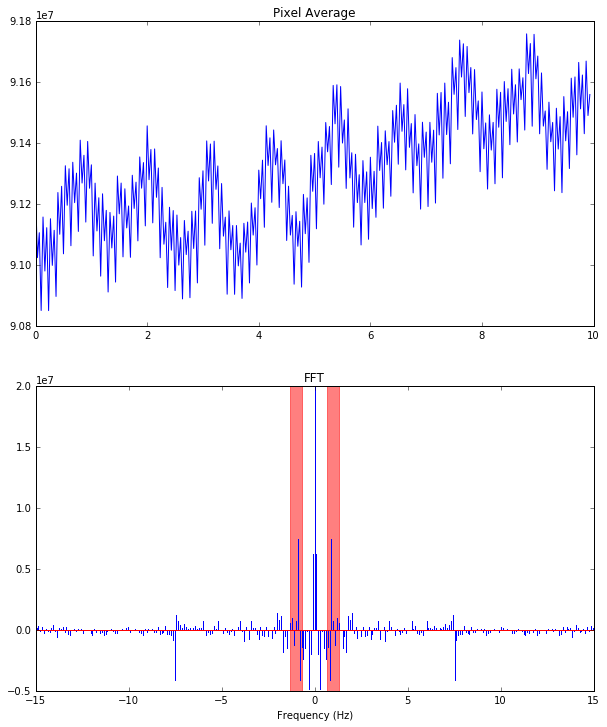

In [64]:
print("Loading video...")
orig_vid, fps = loadVideo('media/face.mp4')
print("Let's examine the video frequency...")
### STUDENT: Try different freq_min, freq_max
freq_min,freq_max = 40.0/60.0,80.0/60.0
### STUDENT END
show_frequencies(orig_vid, fps,freq_min,freq_max)

In [65]:
print("Abracadabra...") 
print("Note that it may take several minutes for the spell to be in effect, so be patient!")
### STUDENT: Try different pyramid_level, freq_min, freq_max, and amplifcation
vid_data = eulerian_magnification(orig_vid, fps, pyramid_levels=3, freq_min=50.0 / 60.0, freq_max=80.0/60.0, amplification=50)
### STUDENT END
mag_data = combine_pyramid_and_save(vid_data, orig_vid, enlarge_multiple=3, fps=fps, save_filename='media/face_magnified.mp4')
print("Boom! Now you can check the result!")

Abracadabra...
Note that it may take several minutes for the spell to be in effect, so be patient!
Applying bandpass between 0.833333333333 and 1.33333333333 Hz


/Users/Ming/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


Amplifying signal by factor of 50
Outputting to media/face_magnified.mp4
Boom! Now you can check the result!


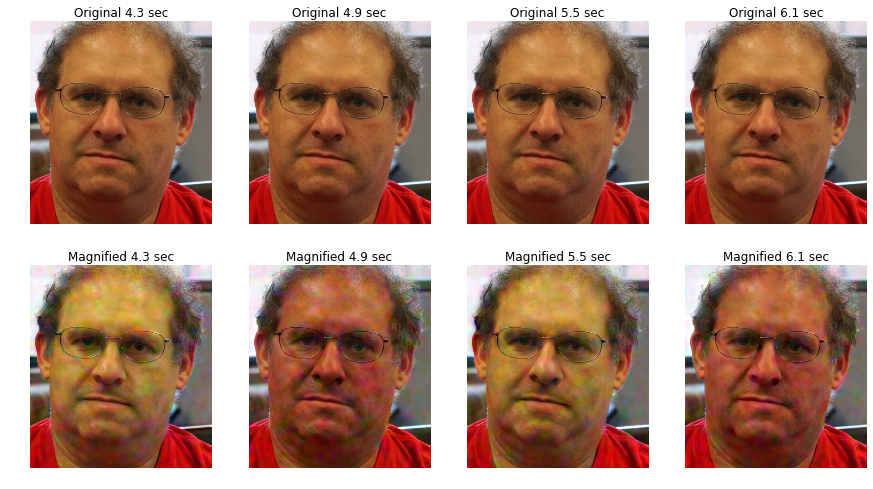

In [66]:
# Let's draw out four representive frames at time 2, 3, 4, 5 seconds
plt.figure(figsize=(15,8))
time_vid = numpy.array([4.3,4.9,5.5,6.1])
time_vec = numpy.array(time_vid*fps, dtype='int')
for time_id in range(4):
    plt.subplot(2, 4, time_id+1),plt.axis("off")
    plt.imshow(orig_vid[time_vec[time_id]]),plt.title('Original '+str((time_vid[time_id]))+' sec')
    plt.subplot(2, 4, 5+time_id),plt.axis("off")
    plt.imshow(mag_data[time_vec[time_id]]),plt.title('Magnified '+str((time_vid[time_id]))+' sec')

<b>Q8:</b> Print out the above plot at time 4.3, 4.9, 5.5, 6.1 seconds.

In [22]:
# Now let's check the video where pulse is revealed1
HTML("""
<video width="396" height="444" controls>
  <source src="media/face_magnified.mp4" type="video/mp4">
</video>
""")

## GOING WILD:  Other Examples

With the success of the previous facial pulse detection, feel free to take your algorithm to test out other examples (http://people.csail.mit.edu/mrub/evm/#code). Parents sometimes worry if the baby is really breathing because it tends to be quite placid while sleeping.. Here is a demo on easing the worries.

In [23]:
# Now let's first take a look at the raw video. 
HTML("""
<video width="396" height="244" controls>
  <source src="media/baby.mp4" type="video/mp4">
</video>
""")

Loading video...
Let's examine the video frequency...


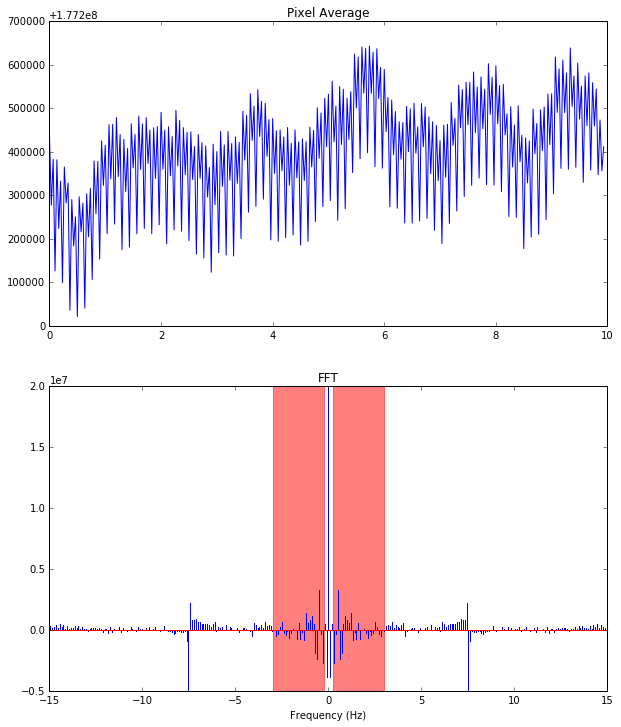

In [24]:
print("Loading video...")
orig_vid, fps = loadVideo('media/baby.mp4')
print("Let's examine the video frequency...")
### STUDENT: Try different freq_min, freq_max
freq_min,freq_max = 15.0/60.0,180.0/60.0
### STUDENT END
show_frequencies(orig_vid, fps,freq_min,freq_max)

In [25]:
print("Abracadabra...")
### STUDENT: Try different pyramid_level, freq_min, freq_max, and amplifcation
vid_data = eulerian_magnification(orig_vid, fps, pyramid_levels=3, freq_min=30.0 / 60.0, freq_max=120.0/60.0, amplification=10)
### STUDENT END
mag_data = combine_pyramid_and_save(vid_data, orig_vid, enlarge_multiple=3, fps=fps, save_filename='media/baby_magnified.mp4')
print("Boom! Now you can check the result!")

Abracadabra...
Applying bandpass between 0.5 and 2.0 Hz


/Users/Ming/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


Amplifying signal by factor of 10
Outputting to media/baby_magnified.mp4
Boom! Now you can check the result!


In [26]:
# Now let's check the video where breathing is revealed.
# Note that it might be optimal to view on Ipython, 
# you can view the video directly on your computer media/baby_magnified.mp4
HTML("""
<video width="396" height="244" controls>
  <source src="media/baby_magnified.mp4" type="video/mp4">
</video>
""")

As William James once said, “The art of being wise is the art of knowing what to overlook”, perhaps because only then you can emphasize what's really important and magnify it! :)

<b>Minilab author:</b> Ming Jin (https://people.eecs.berkeley.edu/~jinming/), 2016 Fall

<b>Reference:</b>
Wu, Hao-Yu, et al. "Eulerian video magnification for revealing subtle changes in the world." ACM Transactions on Graphics (TOG) 31.4 (2012): 65.